In [44]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"

In [60]:
sf_bbvi_small = pd.read_csv("test.csv", index_col=None)
elbo = sf_bbvi_small["elbo"].to_numpy()[380:]
times = sf_bbvi_small["time_steps"].to_numpy()[380:]
times -= np.min(times)

In [76]:
cavi_small = pd.read_csv("cavi_small_dataset.csv")
elbo_cavi_small = cavi_small["elbo"] - 18000
times_cavi_small = cavi_small["time"]

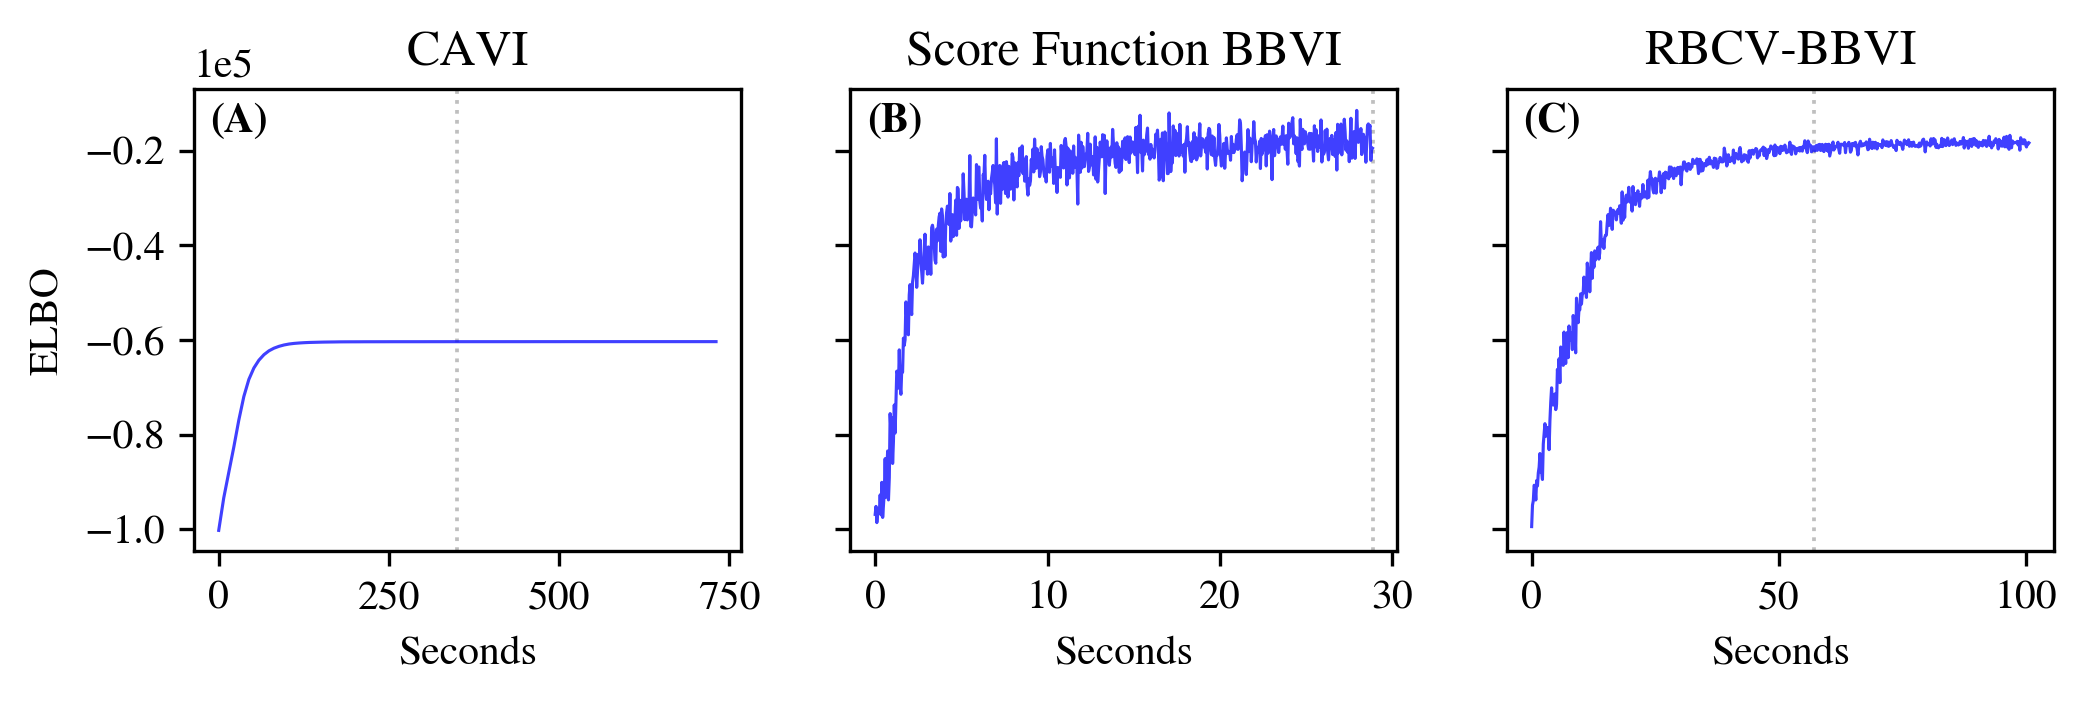

In [222]:
bbvi_df = pd.read_csv("test3.csv")
bbvi_elbo = bbvi_df["elbo"].to_numpy()[100:]
bbvi_times = bbvi_df["time_steps"].to_numpy()[100:]
bbvi_times = bbvi_times - np.min(bbvi_times)

rbcv_bbvi_df = pd.read_csv("test2.csv")
rbcv_bbvi_elbo = rbcv_bbvi_df["elbo"].to_numpy()[:-100] + 6000
rbcv_bbvi_times = rbcv_bbvi_df["time_steps"].to_numpy()[:-100]

cavi_df = pd.read_csv("cav.csv")
cavi_elbo = cavi_df["elbo"].to_numpy() + 7000
cavi_times = cavi_df["time_steps"].to_numpy()

fig, axes = plt.subplots(1, 3, figsize=(8, 2), sharey=True, dpi=300)
for ax in axes.flatten():
    ax.set_xlabel("Seconds")
    ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axes[0].axvline(350, c="gray", ls="dotted", alpha=0.5, lw=0.9)
axes[1].axvline(np.max(bbvi_times), c="gray", ls="dotted", alpha=0.5, lw=0.9)
axes[2].axvline(57, c="gray", ls="dotted", alpha=0.5, lw=0.9)
axes[0].plot(cavi_times, cavi_elbo, lw=0.75, alpha=0.75, c="blue", label="CAVI")
axes[1].plot(bbvi_times, bbvi_elbo, lw=0.75, alpha=0.75, c="blue", label="Score Function BBVI")
axes[2].plot(rbcv_bbvi_times, rbcv_bbvi_elbo, c="blue", lw=0.75, alpha=0.75, label="Rao-Blackwellized Control Variate BBVI")
axes[0].set_ylabel("ELBO")
axes[0].set_title("CAVI")
axes[1].set_title("Score Function BBVI")
axes[2].set_title("RBCV-BBVI")
axes[0].text(0.03, 0.97, "(A)", ha="left", va="top", transform=axes[0].transAxes, weight="bold")
axes[1].text(0.03, 0.97, "(B)", ha="left", va="top", transform=axes[1].transAxes, weight="bold")
axes[2].text(0.03, 0.97, "(C)", ha="left", va="top", transform=axes[2].transAxes, weight="bold")
plt.savefig("vi_algs_elbo.pdf", bbox_inches="tight");

In [219]:
bbvi_elbo[-1], bbvi_elbo[-2], rbcv_bbvi_elbo[-1]

(np.float64(-19499.7490234375),
 np.float64(-19757.9400390625),
 np.float64(-18378.52734375))